In [37]:
# Importando as bibliotecas a serem utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats



In [38]:
# Abrindo o dataset com as colunas desejadas no estudo. 
df = pd.read_csv('/content/breast_cancer - breast_cancer.csv',usecols=['worst concave points', 'mean concavity','worst perimeter','worst radius','worst area','diagnosis'])

# Verificando os 5 primeiros registros
df.head()

,mean concavity,worst radius,worst perimeter,worst area,worst concave points,diagnosis
0,3.001,25.38,184.60,2019.0,2.654,malignant
1,869.000,24.99,158.80,1956.0,186.000,malignant
2,1.974,23.57,152.50,1709.0,243.000,malignant
3,2.414,14.91,98.87,567.7,2.575,malignant
4,198.000,22.54,152.20,1575.0,1.625,malignant


In [39]:

# Separando em subconjuntos. 
df_maligno = df[df['diagnosis'] == 'malignant']
df_benigno = df[df['diagnosis'] == 'benign']


# Verificando os valores distintos da coluna
valores_distintos_maligno = df_maligno['diagnosis'].unique()
valores_distintos_benigno = df_benigno['diagnosis'].unique()



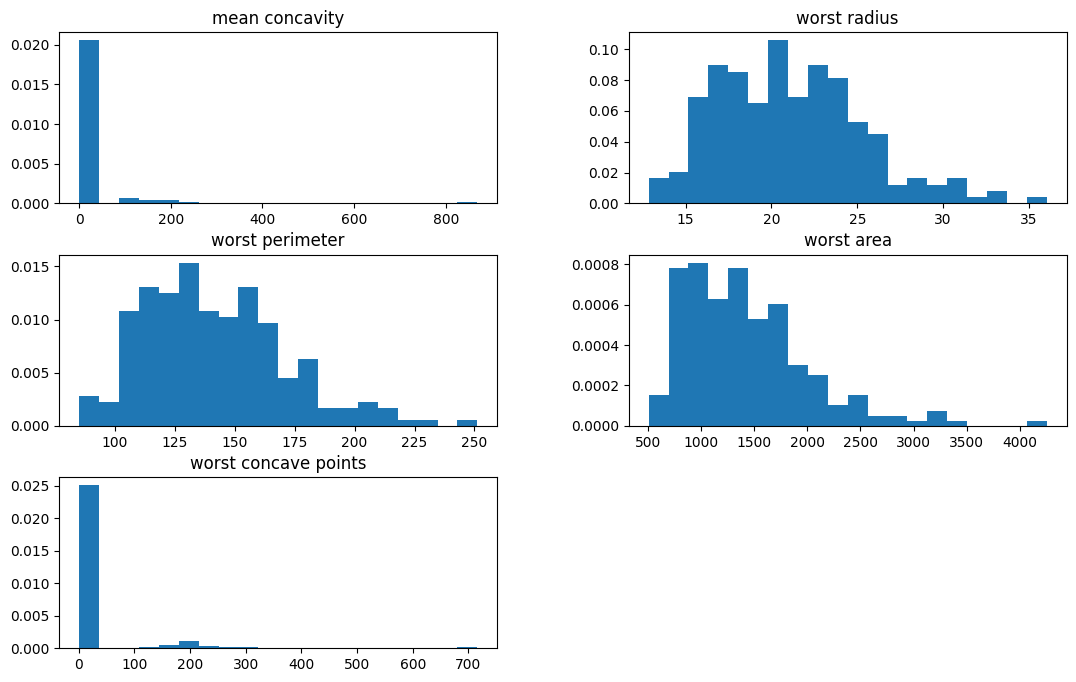

Coluna mean concavity: p-valor = 0.000
Coluna worst radius: p-valor = 0.000
Coluna worst perimeter: p-valor = 0.000
Coluna worst area: p-valor = 0.000
Coluna worst concave points: p-valor = 0.000


In [40]:
# Criando os histogramas das váriaveis no qual diagnóstico = Maligno. 

# Parâmetros. 
# Tamanho, número de separação de barras, listras atrás, histograma com a definição das áreas = 1 (Probabilidade)
df_maligno.hist(figsize=(13, 8), bins=20,grid=False,density=True)
plt.show()

# Aparentemente nenhuma distribuição dos dados possui distribuição normal. 

# Realizando o teste de shapiro wilk. 

# h0:Os dados seguem uma distribuição normal
# h1:Os dados não seguem uma distribuição normal. 

for coluna in df_maligno.columns:
  if coluna != 'diagnosis':
    statistic, p_valor = stats.shapiro(df_maligno[coluna].astype(float))
    print(f'Coluna {coluna}: p-valor = {p_valor:.3f}')

# Portanto, como o p-valor é muito baixo, temos evidências para rejeitar h0. Logo, os dados não seguem uma distribuição normal. 


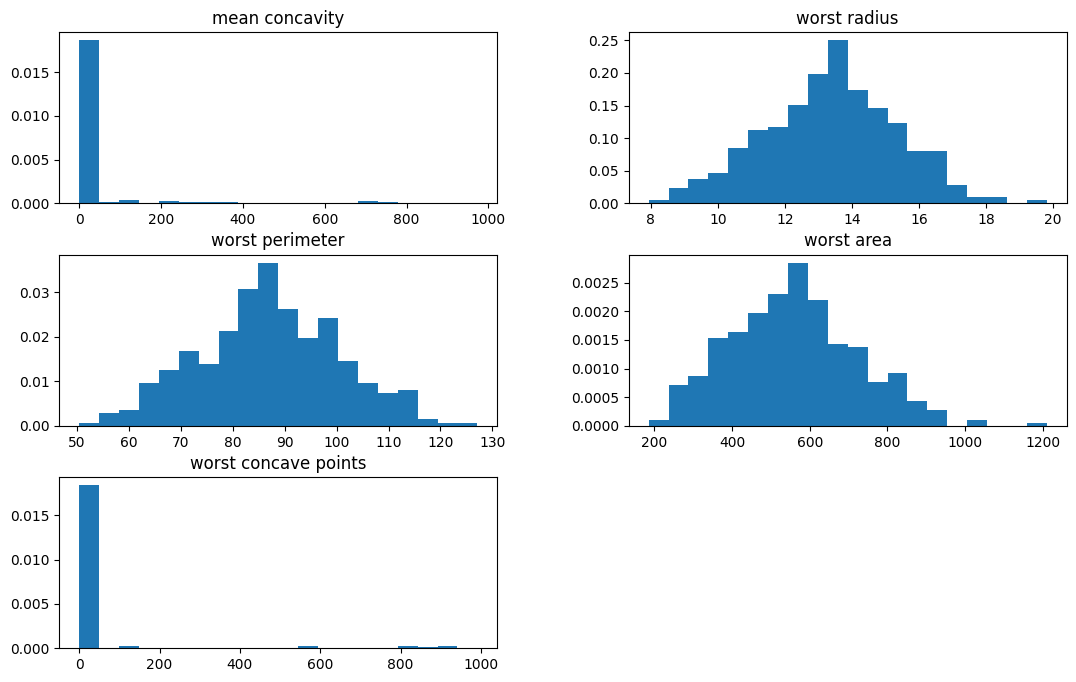

Coluna mean concavity: p-valor = 0.000
Coluna worst radius: p-valor = 0.694
Coluna worst perimeter: p-valor = 0.712
Coluna worst area: p-valor = 0.010
Coluna worst concave points: p-valor = 0.000


In [41]:
# Criando os histogramas das váriaveis no qual diagnóstico = benigno. 



# Parâmetros. 
# Tamanho, número de separação de barras, listras atrás, histograma com a definição das áreas = 1 (Probabilidade)
df_benigno.hist(figsize=(13, 8), bins=20,grid=False,density=True)
plt.show()

# Aparentemente nenhuma distribuição dos dados possui distribuição normal. 

# Realizando o teste de shapiro wilk. 

# h0:Os dados seguem uma distribuição normal
# h1:Os dados não seguem uma distribuição normal. 

for coluna in df_benigno.columns:
  if coluna != 'diagnosis':
    statistic, p_valor = stats.shapiro(df_benigno[coluna].astype(float))
    print(f'Coluna {coluna}: p-valor = {p_valor:.3f}')

# Nas variáveis worst radius e worst perimeter, temos um p-valor alto, ou seja, não temos evidências para rejeitar h0. Portando, não podemos dizer que os dados não seguem uma distribuição normal. 
# No restante, temos evidência para rejeitar h0. Logo, os dados não seguem uma distribuição normal. 

<ipython-input-42-6677a62b2bed>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df_maligno.corr()


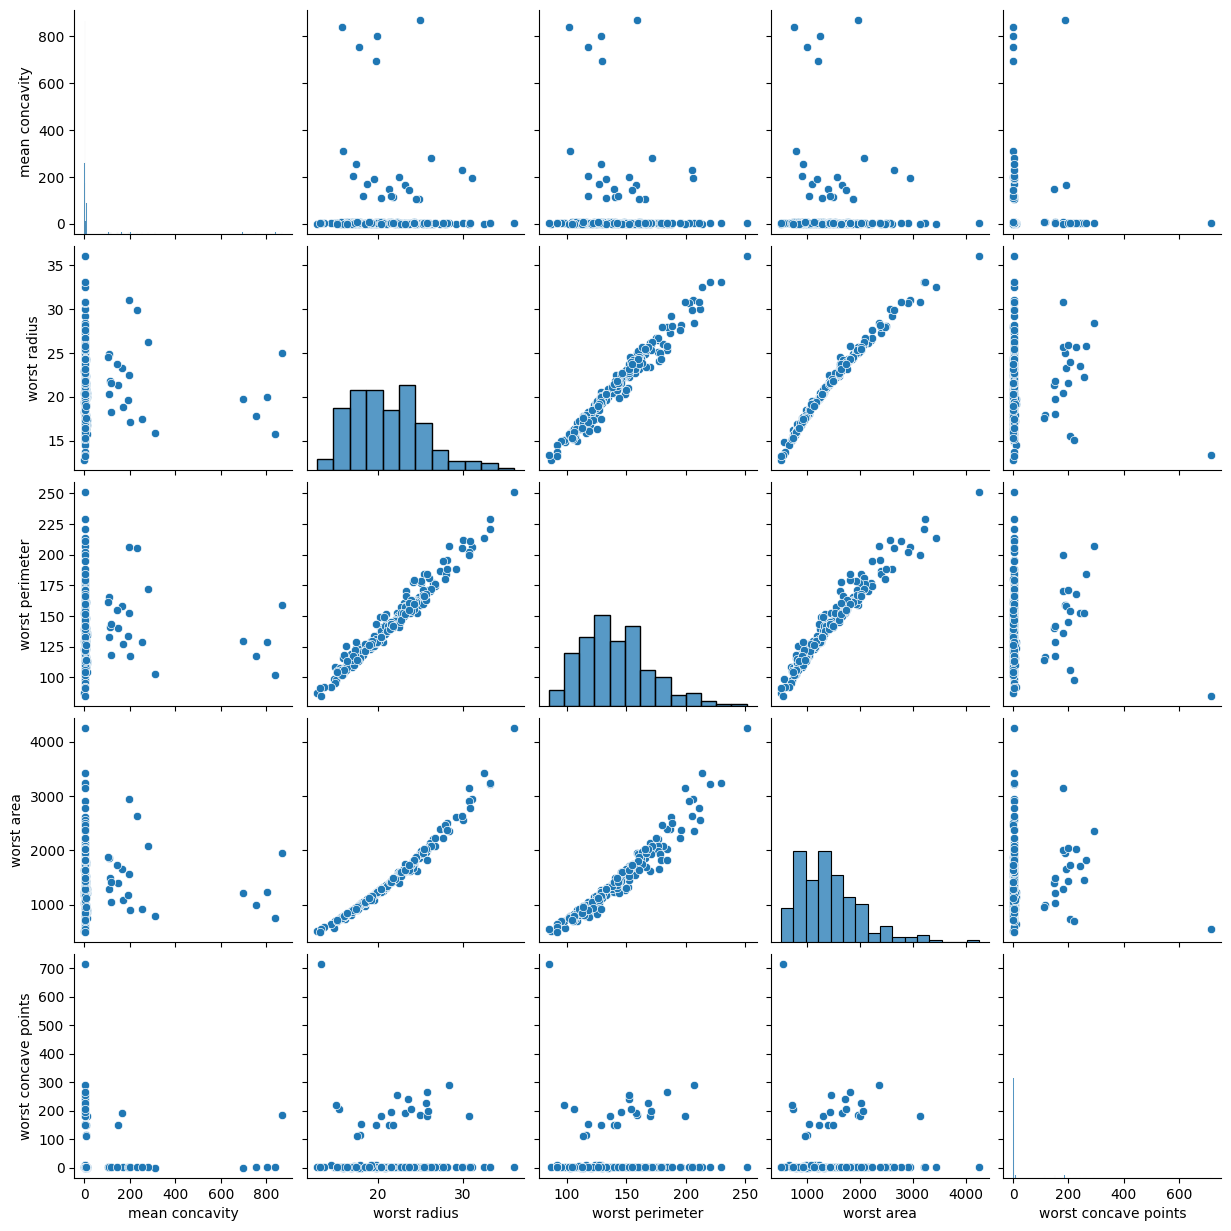

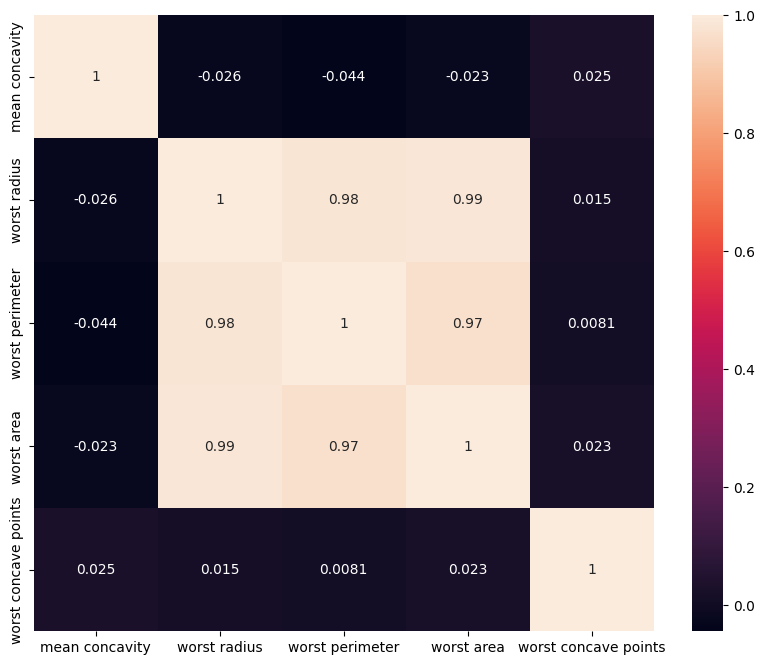

In [42]:
# Gráficos de dispersão dois-a-dois para classificados como malignant

# Parametros
# Dataset, tamanho
sns.pairplot(df_maligno)

print("")

# Criando a matriz de correlação de pearson. 


correlacao = df_maligno.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True)
plt.show()

# Através do gráfico e da matriz de correlação, observamos que nas variáveis com classificação 'malignant' , apenas radius x perimeter, radius x area e perimiter x area possui correlação forte.
# Porém, isto é obvio, pós uma tem origem na outra. 


<ipython-input-43-802041d87461>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df_benigno.corr()


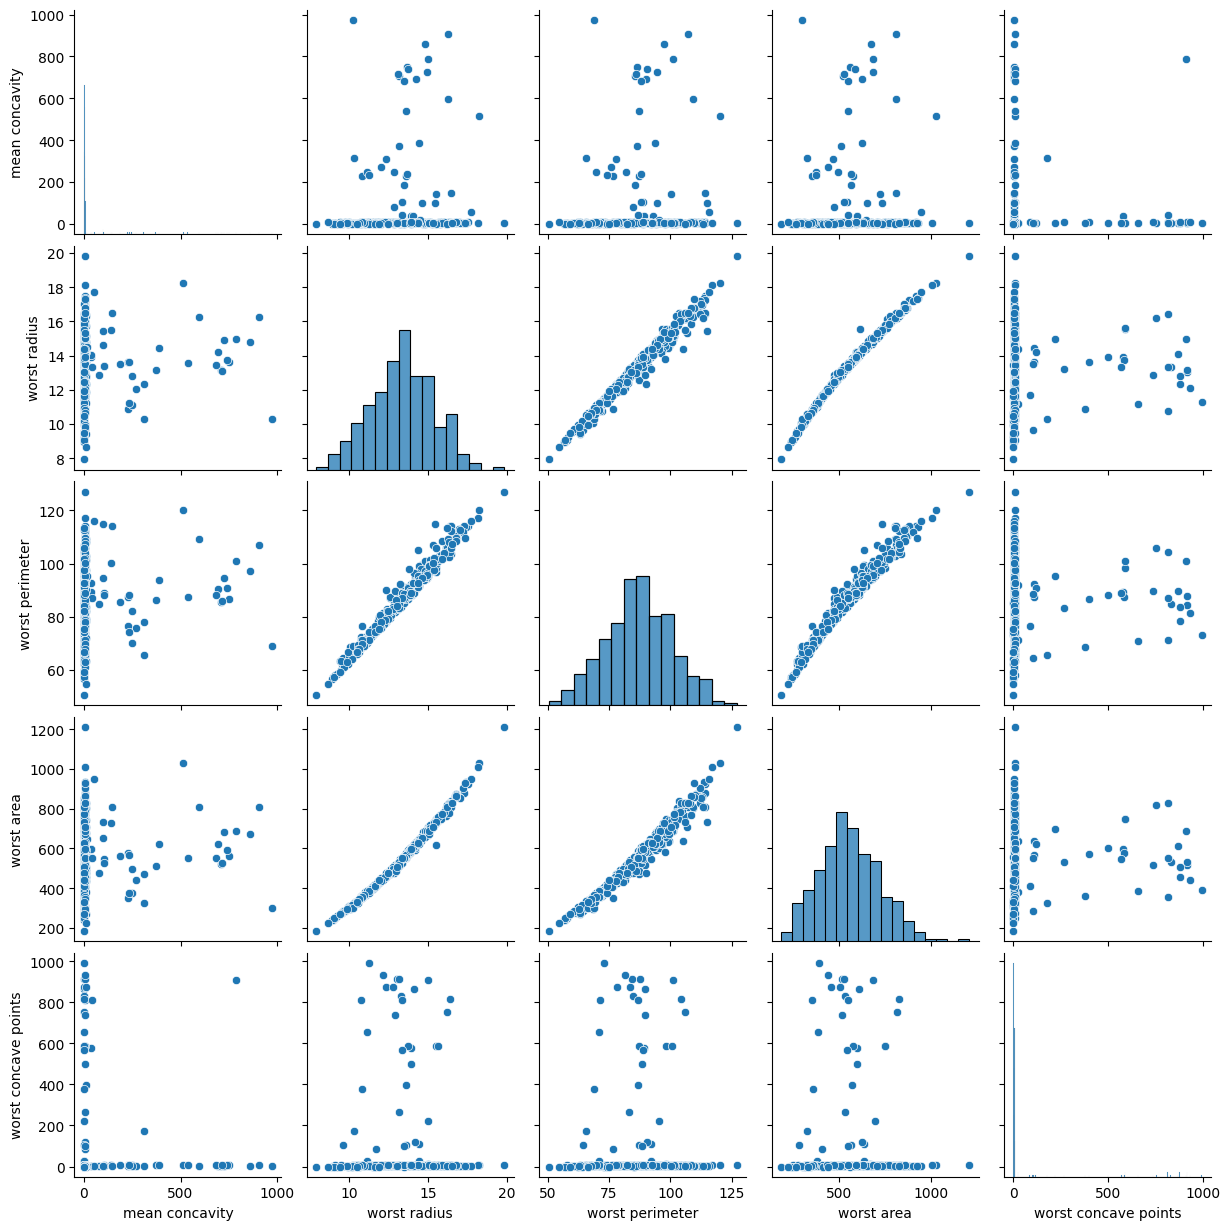

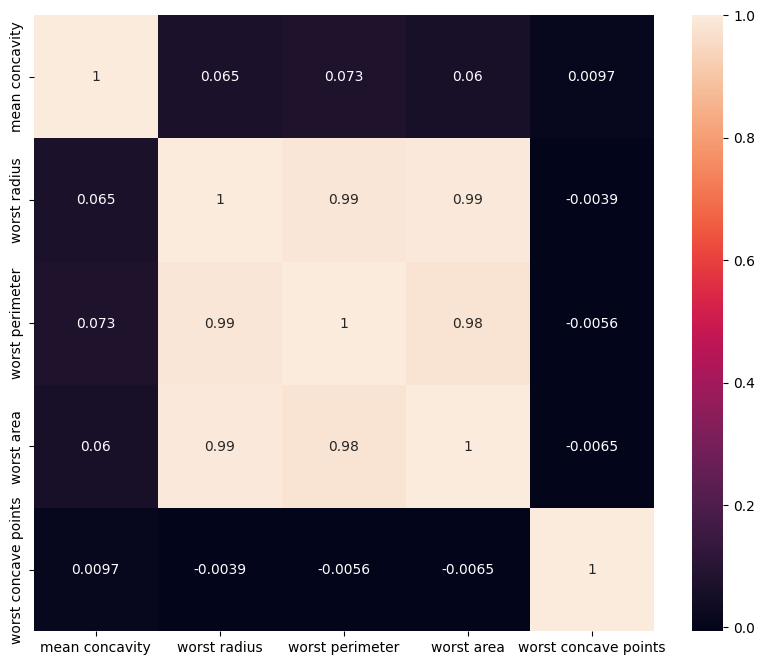

In [43]:
# Gráficos de dispersão dois-a-dois para classificados como benignant

# Parametros
# Dataset, tamanho
sns.pairplot(df_benigno)

print("")

# Criando a matriz de correlação de pearson. 


correlacao = df_benigno.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True)
plt.show()

# De forma análoga ao maligno, somente radius, area e perimetro possuem correlação 2x2.

In [46]:
# Criando o sumário estatístico das colunas

summary_matrix_maligno = df_maligno.describe()
print(summary_matrix_maligno)


       mean concavity  worst radius  worst perimeter   worst area  \
count      212.000000    212.000000       212.000000   212.000000   
mean        36.226476     21.134811       141.370330  1422.286321   
std        128.839599      4.283569        29.457055   597.967743   
min          0.170000     12.840000        85.100000   508.100000   
25%          1.488000     17.730000       119.325000   970.300000   
50%          2.081000     20.590000       138.000000  1303.000000   
75%          4.846500     23.807500       159.800000  1712.750000   
max        869.000000     36.040000       251.200000  4254.000000   

       worst concave points  
count            212.000000  
mean              24.453387  
std               75.969598  
min                1.047000  
25%                1.608500  
50%                1.935500  
75%                2.389250  
max              716.000000  


In [49]:



summary_matrix_benigno = df_benigno.describe()
print(summary_matrix_benigno)


       mean concavity  worst radius  worst perimeter   worst area  \
count      357.000000    357.000000       357.000000   357.000000   
mean        43.794277     13.379801        87.005938   558.899440   
std        149.570953      1.981368        13.527091   163.601424   
min          0.000000      7.930000        50.410000   185.200000   
25%          2.109000     12.080000        78.270000   447.100000   
50%          3.888000     13.350000        86.920000   547.400000   
75%          6.505000     14.800000        96.590000   670.000000   
max        973.000000     19.820000       127.100000  1210.000000   

       worst concave points  
count            357.000000  
mean              55.435336  
std              185.210624  
min                0.000000  
25%                1.561000  
50%                5.882000  
75%                8.235000  
max              991.000000  
